# Explore here

The dataset is composed of dog and cat photos provided as a subset of photos from a much larger collection of 3 million manually annotated photos. This data was obtained through a collaboration between Petfinder.com and Microsoft.

Step 1: Loading the dataset
The dataset is located in Kaggle and you will need to access it to download it. 

Step 2: Visualize the input information
The first step when faced with a picture classification problem is to get as much information as possible through the pictures. Therefore, load and print the first nine pictures of dogs in a single figure. Repeat the same for cats. You can see that the pictures are in color and have different shapes and sizes. Preprocess the data to ensure they all have a fixed size of 200x200 pixels.

If you have more than 12 gigabytes of RAM, use the Keras image processing API to load the 25,000 photos into the training dataset and reshape them to 200×200 pixel square photos. The label must also be determined for each photo based on the file names. A tuple of photos and labels should be saved.
If you have no more than 12 gigabytes of RAM, load the images progressively using the Keras ImageDataGenerator class and the flow_from_directory() function. This will be slower to run but it will run on less capable hardware. This function prefers the data to be split into separate train and test directories, and under each directory to have a subdirectory for each class.
Once you have all the images processed, create an ImageDataGenerator object for training and test data. Then pass the folder that has training data to the trdata object and, similarly, pass the folder that has test data to the tsdata object. In this way, the images will be automatically labeled, and everything will be ready to enter the network.

Step 3: Build an ANN
Any classifier that fits this problem will have to be robust because some images show the cat or dog in a corner, or perhaps 2 cats or dogs in the same picture. If you have been able to research some of the winner implementations of other competitions also related to images, you will see that VGG16 is a CNN architecture used to win the Kaggle ILSVR (Imagenet) competition in 2014. It is considered one of the best performing vision model architectures to date.

Step 4: Optimize the above model
Import the ModelCheckpoint and EarlyStopping method from Keras. Create an object of both and pass them as callback functions to fit_generator. Load the best model and use the test set to make predictions.

Step 5: Save the model
Store the model in the corresponding folder.

In [1]:
import os
import zipfile
import random
from PIL import Image
import numpy as np
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2025-03-21 17:58:04.641813: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 17:58:04.645455: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-21 17:58:04.654523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742579884.669156   28054 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742579884.673485   28054 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742579884.686676   28054 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
load_keys = False

if load_keys:
    # load the .env file variables
    load_dotenv()

    os.environ["KAGGLE_USERNAME"] = os.getenv("KAGGLE_USERNAME")
    os.environ["KAGGLE_KEY"] = os.getenv("KAGGLE_KEY")

    import kaggle
    kaggle.api.authenticate()

In [3]:

load_docs = False

if load_docs:
    kaggle.api.competition_download_files('dogs-vs-cats', path='/workspaces/Dansah2_DeepLearning_machine-learning-python-template/data/raw')

    raw_data_path = "/workspaces/Dansah2_DeepLearning_machine-learning-python-template/data/raw/"

    train_zip = os.path.join(raw_data_path, "train.zip")
    test_zip = os.path.join(raw_data_path, "test1.zip")

    train_extract_path = os.path.join(raw_data_path, "train")
    test_extract_path = os.path.join(raw_data_path, "test")

    # Function to extract a zip file
    def extract_zip(zip_file, extract_to):
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(extract_to)

    # Extract train and test zip files
    extract_zip(train_zip, train_extract_path)
    extract_zip(test_zip, test_extract_path)

    os.remove(train_zip)
    os.remove(test_zip)

In [4]:
def get_images(type):
    # Define the folder path
    folder_path = "/workspaces/Dansah2_DeepLearning_machine-learning-python-template/data/raw/train/train"

    # Get a list of all images (assuming they have the 'type' in their filename)
    images = [img for img in os.listdir(folder_path) if type in img.lower()]

    # Select 9 random images
    selected_images = random.sample(images, 9)

    # Create a 3x3 plot
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))

    # Loop through the images and plot them
    for ax, img_name in zip(axes.flatten(), selected_images):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis("off")  # Hide axes

    plt.show()

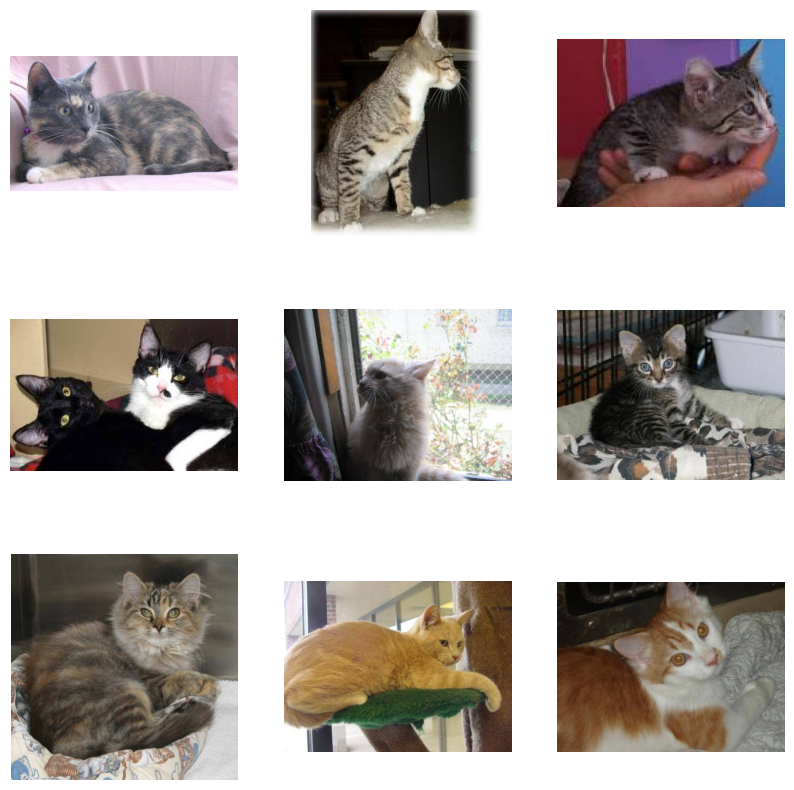

In [5]:
get_images('cat')

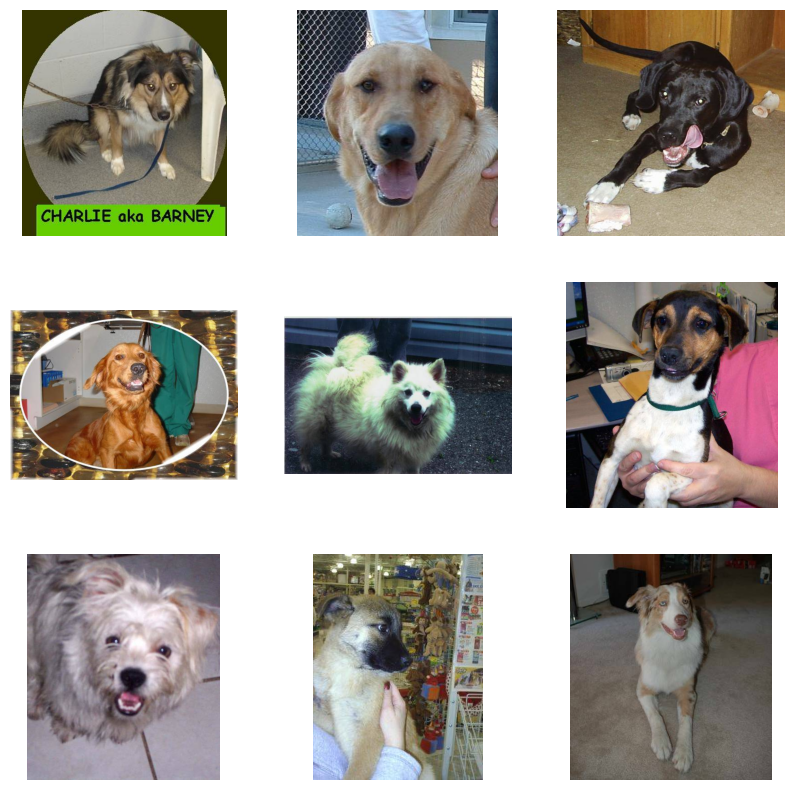

In [6]:
get_images('dog')

In [7]:
# Define directories
train_dir = "/workspaces/Dansah2_DeepLearning_machine-learning-python-template/data/raw/train/train"
test_dir = "/workspaces/Dansah2_DeepLearning_machine-learning-python-template/data/raw/test/test1"

# Function to count images
def count_images(directory, name):
    if not os.path.exists(directory):
        print(f"Directory not found: {directory}")
        return 0
    
    # Filter only image files (common extensions)
    image_extensions = (".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff", ".webp")
    image_files = [file for file in os.listdir(directory) if file.lower().endswith(image_extensions)]
    if name == 'Testing':
        print(f"{name} Folder total images: {len(image_files)}")
    else:
        cat_images = [file for file in os.listdir(directory) if 'cat' in file.lower()]
        dog_images = [file for file in os.listdir(directory) if 'dog' in file.lower()]
        print(f"{name} Folder: Dog images: {len(dog_images)}, Cat images: {len(cat_images)} Total images: {len(image_files)}")
    

# Count and print
count_images(train_dir, 'Training')
count_images(test_dir, 'Testing')

Training Folder: Dog images: 12500, Cat images: 12500 Total images: 25000
Testing Folder total images: 12500


In [ ]:
import shutil
create_val_folder = False

if create_val_folder:
    base_dir = '/workspaces/Dansah2_DeepLearning_machine-learning-python-template/data/raw'
    train_dir = os.path.join(train_dir, "train")

    validation_dir = os.path.join(base_dir, 'validation')
    os.makedirs(validation_dir)

    cat_valid_dir = os.path.join(validation_dir, "cats")
    dog_valid_dir = os.path.join(validation_dir, "dogs")

    os.makedirs(cat_valid_dir, exist_ok=True)
    os.makedirs(dog_valid_dir, exist_ok=True)

    cat_list = [img for img in os.listdir(train_dir) if 'cat' in img.lower()]
    dog_list = [img for img in os.listdir(train_dir) if 'dog' in img.lower()]

    cat_images = random.sample(cat_list, 1000)
    dog_images = random.sample(dog_list, 1000)

    for img in cat_images:
        shutil.move(os.path.join(train_dir, img), os.path.join(cat_valid_dir, img))

    for img in dog_images:
        shutil.move(os.path.join(train_dir, img), os.path.join(dog_valid_dir, img))
    
    print("Successfully moved 1000 cat and 1000 dog images to validation folder.")

Successfully moved 1000 cat and 1000 dog images to validation folder.


In [11]:
validation_cats = '/workspaces/Dansah2_DeepLearning_machine-learning-python-template/data/raw/validation/cats'
validation_dogs = '/workspaces/Dansah2_DeepLearning_machine-learning-python-template/data/raw/validation/dogs'
count_images(validation_cats, 'Validation Cat')
count_images(validation_dogs, 'Validation Dog')

Validation Cat Folder: Dog images: 0, Cat images: 1000 Total images: 1000
Validation Dog Folder: Dog images: 1000, Cat images: 0 Total images: 1000
